# Mental Health FAQs 

In [1]:
import pandas as pd
import numpy as np
import nltk
import re 
import spacy
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,RandomForestRegressor,ExtraTreesRegressor

In [3]:
df = pd.read_excel("D:\\healthcare_faq\\Mental_Health_FAQ_data.xlsx")
df_new = pd.read_excel("D:\\healthcare_faq\\Mental_Health_FAQ_data.xlsx")

In [4]:
df

,Question_ID,Questions,Answers
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi..."
...,...,...,...
95,4352464,How can I convince my kids not to use drugs?,You can't. But you can influence their capacit...
96,6521784,What is the legal status (and evidence) of CBD...,Cannabidiol or CBD is a naturally occurring co...
97,3221856,What is the evidence on vaping?,"""Vaping"" is the term for using a device where ..."
98,6378667,what are the common symptoms of allergy ?,Common symptoms of an allergic reaction includ...


In [5]:
df.drop(["Question_ID"],axis=1,inplace=True)

In [6]:
df.head(5)

,Questions,Answers
0,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,Can people with mental illness recover?,"When healing from mental illness, early identi..."


In [7]:
df.isna().sum()

Questions    0
Answers      0
dtype: int64

In [8]:
text_col = ["Questions","Answers"]
for x in text_col:
    df[x+'_new'] = df[x].str.lower()

In [9]:
exclude = string.punctuation
text_col = ["Questions_new","Answers_new"]
def remove_punc(txt):
    txt = txt.translate(str.maketrans('','',exclude))
    return txt
for x in text_col:
    df[x] = df[x].apply(remove_punc)

In [10]:
df.Answers_new[1]

'it is estimated that mental illness affects 1 in 5 adults in america and that 1 in 24 adults have a serious mental illness mental illness does not discriminate it can affect anyone regardless of gender age income social status ethnicity religion sexual orientation or background\nalthough mental illness can affect anyone certain conditions may be more common in different populations for instance eating disorders tend to occur more often in females while disorders such as attention deficithyperactivity disorder is more prevalent in children\nadditionally all ages are susceptible but the young and the old are especially vulnerable mental illnesses usually strike individuals in the prime of their lives with 75 percent of mental health conditions developing by the age of 24 this makes identification and treatment of mental disorders particularly difficult because the normal personality and behavioral changes of adolescence may mask symptoms of a mental health condition\nparents and caretak

In [11]:
extra_punct = [
    ',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&',
    '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',
    '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾',
    '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
    'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
    '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤','ã']

In [12]:
def remove_extra_punc(text):
    return ''.join([word for word in text if word not in extra_punct])

for x in text_col:
    df[x] = df[x].apply(remove_extra_punc)


In [13]:
df.Answers_new[1]

'it is estimated that mental illness affects 1 in 5 adults in america and that 1 in 24 adults have a serious mental illness mental illness does not discriminate it can affect anyone regardless of gender age income social status ethnicity religion sexual orientation or background\nalthough mental illness can affect anyone certain conditions may be more common in different populations for instance eating disorders tend to occur more often in females while disorders such as attention deficithyperactivity disorder is more prevalent in children\nadditionally all ages are susceptible but the young and the old are especially vulnerable mental illnesses usually strike individuals in the prime of their lives with 75 percent of mental health conditions developing by the age of 24 this makes identification and treatment of mental disorders particularly difficult because the normal personality and behavioral changes of adolescence may mask symptoms of a mental health condition\nparents and caretak

In [14]:
# conversion of numbers to text(word)

import inflect
p = inflect.engine()
def convert_numbers(text):
    text_str = text.split()
    new_string = []
    for word in text_str:
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
        else:
            new_string.append(word)
    text_str = ' '.join(new_string)
    return text_str
for x in text_col:
    df[x] = df[x].apply(convert_numbers)

In [15]:
df.Answers_new[1]

'it is estimated that mental illness affects one in five adults in america and that one in twenty-four adults have a serious mental illness mental illness does not discriminate it can affect anyone regardless of gender age income social status ethnicity religion sexual orientation or background although mental illness can affect anyone certain conditions may be more common in different populations for instance eating disorders tend to occur more often in females while disorders such as attention deficithyperactivity disorder is more prevalent in children additionally all ages are susceptible but the young and the old are especially vulnerable mental illnesses usually strike individuals in the prime of their lives with seventy-five percent of mental health conditions developing by the age of twenty-four this makes identification and treatment of mental disorders particularly difficult because the normal personality and behavioral changes of adolescence may mask symptoms of a mental heal

In [16]:
lb = LabelEncoder()
df['Answer_encode'] = lb.fit_transform(df['Answers_new'])

In [17]:
df

,Questions,Answers,Questions_new,Answers_new,Answer_encode
0,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...,what does it mean to have a mental illness,mental illnesses are health conditions that di...,47
1,Who does mental illness affect?,It is estimated that mental illness affects 1 ...,who does mental illness affect,it is estimated that mental illness affects on...,36
2,What causes mental illness?,It is estimated that mental illness affects 1 ...,what causes mental illness,it is estimated that mental illness affects on...,35
3,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...,what are some of the warning signs of mental i...,symptoms of mental health disorders vary depen...,72
4,Can people with mental illness recover?,"When healing from mental illness, early identi...",can people with mental illness recover,when healing from mental illness early identif...,92
...,...,...,...,...,...
95,How can I convince my kids not to use drugs?,You can't. But you can influence their capacit...,how can i convince my kids not to use drugs,you cant but you can influence their capacity ...,97
96,What is the legal status (and evidence) of CBD...,Cannabidiol or CBD is a naturally occurring co...,what is the legal status and evidence of cbd oil,cannabidiol or cbd is a naturally occurring co...,15
97,What is the evidence on vaping?,"""Vaping"" is the term for using a device where ...",what is the evidence on vaping,vaping is the term for using a device where li...,86
98,what are the common symptoms of allergy ?,Common symptoms of an allergic reaction includ...,what are the common symptoms of allergy,common symptoms of an allergic reaction includ...,19


In [18]:
# # removal of stop words

# def remove_stopwords(text):
#     new_text =[]
#     for word in text.split():
#         if word in stopwords.words('english'):
#             new_text.append('')
#         else:
#             new_text.append(word)
#     x=new_text[:]
#     new_text.clear()
#     return " ".join(x)
# for col in text_col:
#     df[col] = df[col].apply(remove_stopwords)


In [19]:
df

,Questions,Answers,Questions_new,Answers_new,Answer_encode
0,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...,what does it mean to have a mental illness,mental illnesses are health conditions that di...,47
1,Who does mental illness affect?,It is estimated that mental illness affects 1 ...,who does mental illness affect,it is estimated that mental illness affects on...,36
2,What causes mental illness?,It is estimated that mental illness affects 1 ...,what causes mental illness,it is estimated that mental illness affects on...,35
3,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...,what are some of the warning signs of mental i...,symptoms of mental health disorders vary depen...,72
4,Can people with mental illness recover?,"When healing from mental illness, early identi...",can people with mental illness recover,when healing from mental illness early identif...,92
...,...,...,...,...,...
95,How can I convince my kids not to use drugs?,You can't. But you can influence their capacit...,how can i convince my kids not to use drugs,you cant but you can influence their capacity ...,97
96,What is the legal status (and evidence) of CBD...,Cannabidiol or CBD is a naturally occurring co...,what is the legal status and evidence of cbd oil,cannabidiol or cbd is a naturally occurring co...,15
97,What is the evidence on vaping?,"""Vaping"" is the term for using a device where ...",what is the evidence on vaping,vaping is the term for using a device where li...,86
98,what are the common symptoms of allergy ?,Common symptoms of an allergic reaction includ...,what are the common symptoms of allergy,common symptoms of an allergic reaction includ...,19


## Tokenisation

In [20]:
# Tokenisation using spacy

nlp = spacy.load('en_core_web_sm')
for x in text_col:
    new_list = []
    for sent in df[x]:
        new_list.append(nlp(sent))
    df[x+'_token'] = new_list
    new_list.clear()

In [21]:
df

,Questions,Answers,Questions_new,Answers_new,Answer_encode,Questions_new_token,Answers_new_token
0,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...,what does it mean to have a mental illness,mental illnesses are health conditions that di...,47,"(what, does, it, mean, to, have, a, mental, il...","(mental, illnesses, are, health, conditions, t..."
1,Who does mental illness affect?,It is estimated that mental illness affects 1 ...,who does mental illness affect,it is estimated that mental illness affects on...,36,"(who, does, mental, illness, affect)","(it, is, estimated, that, mental, illness, aff..."
2,What causes mental illness?,It is estimated that mental illness affects 1 ...,what causes mental illness,it is estimated that mental illness affects on...,35,"(what, causes, mental, illness)","(it, is, estimated, that, mental, illness, aff..."
3,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...,what are some of the warning signs of mental i...,symptoms of mental health disorders vary depen...,72,"(what, are, some, of, the, warning, signs, of,...","(symptoms, of, mental, health, disorders, vary..."
4,Can people with mental illness recover?,"When healing from mental illness, early identi...",can people with mental illness recover,when healing from mental illness early identif...,92,"(can, people, with, mental, illness, recover)","(when, healing, from, mental, illness, early, ..."
...,...,...,...,...,...,...,...
95,How can I convince my kids not to use drugs?,You can't. But you can influence their capacit...,how can i convince my kids not to use drugs,you cant but you can influence their capacity ...,97,"(how, can, i, convince, my, kids, not, to, use...","(you, ca, nt, but, you, can, influence, their,..."
96,What is the legal status (and evidence) of CBD...,Cannabidiol or CBD is a naturally occurring co...,what is the legal status and evidence of cbd oil,cannabidiol or cbd is a naturally occurring co...,15,"(what, is, the, legal, status, and, evidence, ...","(cannabidiol, or, cbd, is, a, naturally, occur..."
97,What is the evidence on vaping?,"""Vaping"" is the term for using a device where ...",what is the evidence on vaping,vaping is the term for using a device where li...,86,"(what, is, the, evidence, on, vaping)","(vaping, is, the, term, for, using, a, device,..."
98,what are the common symptoms of allergy ?,Common symptoms of an allergic reaction includ...,what are the common symptoms of allergy,common symptoms of an allergic reaction includ...,19,"(what, are, the, common, symptoms, of, allergy)","(common, symptoms, of, an, allergic, reaction,..."


## Lemmatization

In [22]:
# Lemmatization
text_cols = ['Questions_new_token' ,'Answers_new_token']
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
for x in text_cols:
    new_list = []
    for sent in df[x]:
        lem_word = [lemmatizer.lemmatize(token.text) for token in sent]
        new_list.append(lem_word)
    df[x] = new_list

In [23]:
df.head()

,Questions,Answers,Questions_new,Answers_new,Answer_encode,Questions_new_token,Answers_new_token
0,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...,what does it mean to have a mental illness,mental illnesses are health conditions that di...,47,"[what, doe, it, mean, to, have, a, mental, ill...","[mental, illness, are, health, condition, that..."
1,Who does mental illness affect?,It is estimated that mental illness affects 1 ...,who does mental illness affect,it is estimated that mental illness affects on...,36,"[who, doe, mental, illness, affect]","[it, is, estimated, that, mental, illness, aff..."
2,What causes mental illness?,It is estimated that mental illness affects 1 ...,what causes mental illness,it is estimated that mental illness affects on...,35,"[what, cause, mental, illness]","[it, is, estimated, that, mental, illness, aff..."
3,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...,what are some of the warning signs of mental i...,symptoms of mental health disorders vary depen...,72,"[what, are, some, of, the, warning, sign, of, ...","[symptom, of, mental, health, disorder, vary, ..."
4,Can people with mental illness recover?,"When healing from mental illness, early identi...",can people with mental illness recover,when healing from mental illness early identif...,92,"[can, people, with, mental, illness, recover]","[when, healing, from, mental, illness, early, ..."


## Now I will try 2 methods of converting words to vectors : 
#### 1. Word2vec
#### 2. TF-IDF

## Using gensim library for implementing word2vec

In [24]:
# changing words to numbers/vectors

import gensim
model_wtv = gensim.models.Word2Vec(
    window = 10,
    min_count=2
) 

In [25]:
story = []
voc = []
for name in text_cols:
    story.append([word for word in df[name]])


for x in range(len(story)):
    for y in range(len(story[x])):
        for z in range(len(story[x][y])):
            voc.append(story[x][y][z].strip())

In [26]:
(voc)    # vocabulary

['what',
 'doe',
 'it',
 'mean',
 'to',
 'have',
 'a',
 'mental',
 'illness',
 'who',
 'doe',
 'mental',
 'illness',
 'affect',
 'what',
 'cause',
 'mental',
 'illness',
 'what',
 'are',
 'some',
 'of',
 'the',
 'warning',
 'sign',
 'of',
 'mental',
 'illness',
 'can',
 'people',
 'with',
 'mental',
 'illness',
 'recover',
 'what',
 'should',
 'i',
 'do',
 'if',
 'i',
 'know',
 'someone',
 'who',
 'appears',
 'to',
 'have',
 'the',
 'symptom',
 'of',
 'a',
 'mental',
 'disorder',
 'how',
 'can',
 'i',
 'find',
 'a',
 'mental',
 'health',
 'professional',
 'for',
 'myself',
 'or',
 'my',
 'child',
 'what',
 'treatment',
 'option',
 'are',
 'available',
 'if',
 'i',
 'become',
 'involved',
 'in',
 'treatment',
 'what',
 'do',
 'i',
 'need',
 'to',
 'know',
 'what',
 'is',
 'the',
 'difference',
 'between',
 'mental',
 'health',
 'professional',
 'how',
 'can',
 'i',
 'find',
 'a',
 'mental',
 'health',
 'professional',
 'right',
 'for',
 'my',
 'child',
 'or',
 'myself',
 'if',
 'i',
 'b

### WordCloud

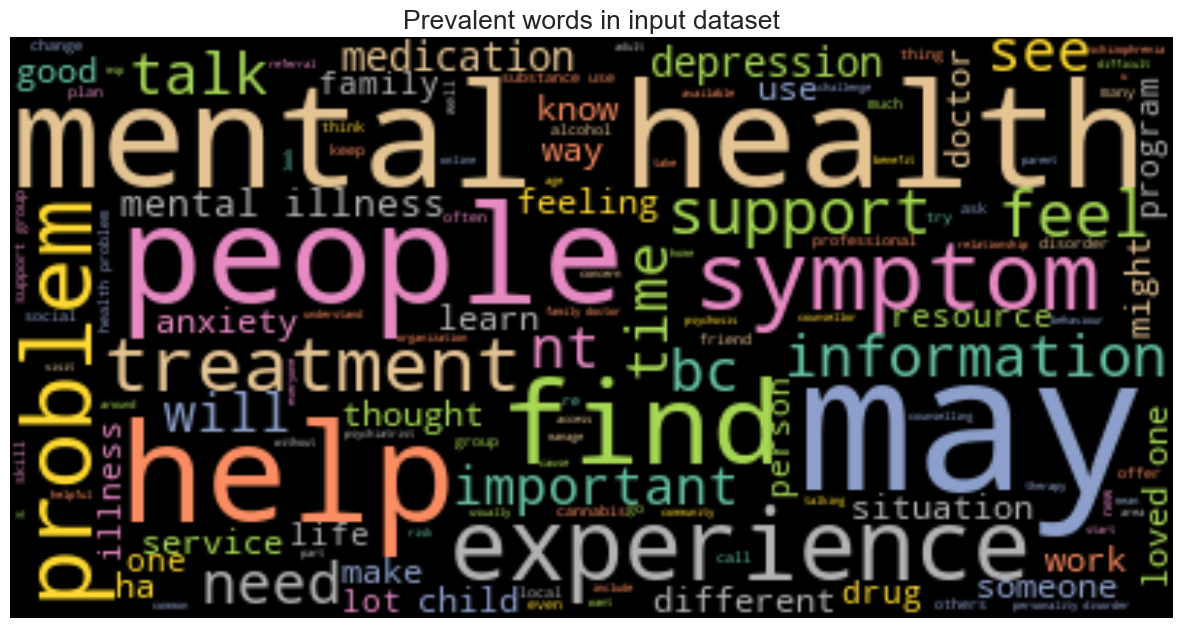

In [27]:

sns.set_style('darkgrid')
plt.rc('figure',figsize=(17,13))
from wordcloud import WordCloud,STOPWORDS
text = ",".join(word for word in voc)
wordcloud = WordCloud(max_words=450, colormap='Set2',background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.title('Prevalent words in input dataset',fontsize=19)
plt.show()

In [28]:
model_wtv.build_vocab(voc)

In [29]:
model_wtv.train(voc,total_examples=model_wtv.corpus_count,epochs=model_wtv.epochs)

(110775, 655850)

In [30]:
len(model_wtv.wv.index_to_key)

43

In [31]:
import numpy as np
def document_vector(doc):
    vectors = []
    for x in doc:
        for km in x:
            km = [word for word in km if word in model_wtv.wv.index_to_key]
            if km:  # Check if km is not empty
                vectors.append(np.mean(model_wtv.wv[km], axis=0))
    if vectors:  # Check if vectors list is not empty
        return np.mean(vectors, axis=0)
    else:
        return np.zeros_like(model_wtv.wv.vectors[0])  # Return zero vector if no valid words are found


In [32]:
df.head()

,Questions,Answers,Questions_new,Answers_new,Answer_encode,Questions_new_token,Answers_new_token
0,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...,what does it mean to have a mental illness,mental illnesses are health conditions that di...,47,"[what, doe, it, mean, to, have, a, mental, ill...","[mental, illness, are, health, condition, that..."
1,Who does mental illness affect?,It is estimated that mental illness affects 1 ...,who does mental illness affect,it is estimated that mental illness affects on...,36,"[who, doe, mental, illness, affect]","[it, is, estimated, that, mental, illness, aff..."
2,What causes mental illness?,It is estimated that mental illness affects 1 ...,what causes mental illness,it is estimated that mental illness affects on...,35,"[what, cause, mental, illness]","[it, is, estimated, that, mental, illness, aff..."
3,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...,what are some of the warning signs of mental i...,symptoms of mental health disorders vary depen...,72,"[what, are, some, of, the, warning, sign, of, ...","[symptom, of, mental, health, disorder, vary, ..."
4,Can people with mental illness recover?,"When healing from mental illness, early identi...",can people with mental illness recover,when healing from mental illness early identif...,92,"[can, people, with, mental, illness, recover]","[when, healing, from, mental, illness, early, ..."


In [33]:
for name in text_cols:
    df[name+'_vector'] = df[name].apply(document_vector)

In [34]:
df.head()

,Questions,Answers,Questions_new,Answers_new,Answer_encode,Questions_new_token,Answers_new_token,Questions_new_token_vector,Answers_new_token_vector
0,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...,what does it mean to have a mental illness,mental illnesses are health conditions that di...,47,"[what, doe, it, mean, to, have, a, mental, ill...","[mental, illness, are, health, condition, that...","[-0.13885128, 0.14951767, 0.023653232, 0.12568...","[-0.124045186, 0.15956837, 0.04821799, 0.10624..."
1,Who does mental illness affect?,It is estimated that mental illness affects 1 ...,who does mental illness affect,it is estimated that mental illness affects on...,36,"[who, doe, mental, illness, affect]","[it, is, estimated, that, mental, illness, aff...","[-0.1228714, 0.161857, 0.04773944, 0.12021308,...","[-0.12443076, 0.16114955, 0.051157847, 0.10277..."
2,What causes mental illness?,It is estimated that mental illness affects 1 ...,what causes mental illness,it is estimated that mental illness affects on...,35,"[what, cause, mental, illness]","[it, is, estimated, that, mental, illness, aff...","[-0.1184541, 0.13189214, 0.03163268, 0.1158785...","[-0.124648, 0.16130844, 0.051123615, 0.1027470..."
3,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...,what are some of the warning signs of mental i...,symptoms of mental health disorders vary depen...,72,"[what, are, some, of, the, warning, sign, of, ...","[symptom, of, mental, health, disorder, vary, ...","[-0.12521087, 0.14756802, 0.04365543, 0.119820...","[-0.12145316, 0.16250236, 0.050751243, 0.11012..."
4,Can people with mental illness recover?,"When healing from mental illness, early identi...",can people with mental illness recover,when healing from mental illness early identif...,92,"[can, people, with, mental, illness, recover]","[when, healing, from, mental, illness, early, ...","[-0.120167635, 0.15283908, 0.04282169, 0.12373...","[-0.12301713, 0.16127646, 0.04931035, 0.108454..."


In [35]:
def Average(lst): 
    return lst.mean() 
vector_cols=['Questions_new_token_vector','Answers_new_token_vector']
#converting 2-d array columns in dataframe to 1-d
for name in vector_cols:
    p=[]
    for index, value in df[name].iteritems():
        p.append(Average(value))
    df[name+'_average']=p


C:\Users\nisht\AppData\Local\Temp\ipykernel_33704\1461861403.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df[name].iteritems():
C:\Users\nisht\AppData\Local\Temp\ipykernel_33704\1461861403.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df[name].iteritems():


In [36]:
df['Questions_new_token_vector_average']=np.array(df['Questions_new_token_vector_average']).reshape(-1,1)

In [77]:
x_train,x_test,y_train,y_test = train_test_split(df['Questions_new_token_vector_average'],df['Answer_encode'],test_size = 0.2)

In [78]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.1, dual=False, max_iter=1000)


In [79]:
df.head()

,Questions,Answers,Questions_new,Answers_new,Answer_encode,Questions_new_token,Answers_new_token,Questions_new_token_vector,Answers_new_token_vector,Questions_new_token_vector_average,Answers_new_token_vector_average
0,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...,what does it mean to have a mental illness,mental illnesses are health conditions that di...,47,"[what, doe, it, mean, to, have, a, mental, ill...","[mental, illness, are, health, condition, that...","[-0.13885128, 0.14951767, 0.023653232, 0.12568...","[-0.124045186, 0.15956837, 0.04821799, 0.10624...",0.014922,0.012847
1,Who does mental illness affect?,It is estimated that mental illness affects 1 ...,who does mental illness affect,it is estimated that mental illness affects on...,36,"[who, doe, mental, illness, affect]","[it, is, estimated, that, mental, illness, aff...","[-0.1228714, 0.161857, 0.04773944, 0.12021308,...","[-0.12443076, 0.16114955, 0.051157847, 0.10277...",0.013980,0.012881
2,What causes mental illness?,It is estimated that mental illness affects 1 ...,what causes mental illness,it is estimated that mental illness affects on...,35,"[what, cause, mental, illness]","[it, is, estimated, that, mental, illness, aff...","[-0.1184541, 0.13189214, 0.03163268, 0.1158785...","[-0.124648, 0.16130844, 0.051123615, 0.1027470...",0.013849,0.012892
3,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...,what are some of the warning signs of mental i...,symptoms of mental health disorders vary depen...,72,"[what, are, some, of, the, warning, sign, of, ...","[symptom, of, mental, health, disorder, vary, ...","[-0.12521087, 0.14756802, 0.04365543, 0.119820...","[-0.12145316, 0.16250236, 0.050751243, 0.11012...",0.012803,0.013203
4,Can people with mental illness recover?,"When healing from mental illness, early identi...",can people with mental illness recover,when healing from mental illness early identif...,92,"[can, people, with, mental, illness, recover]","[when, healing, from, mental, illness, early, ...","[-0.120167635, 0.15283908, 0.04282169, 0.12373...","[-0.12301713, 0.16127646, 0.04931035, 0.108454...",0.012474,0.013228


In [80]:
x_train = np.array(x_train).reshape(-1,1)
lsvc.fit(np.array(x_train).reshape(-1, 1), y_train)


LinearSVC(C=0.1, dual=False)

In [81]:
x_test = np.array(x_test).reshape(-1,1)
y_pred = lsvc.predict(np.array(x_test).reshape(-1,1))

In [82]:
report = classification_report(y_test,y_pred)

C:\Users\nisht\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisht\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisht\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisht\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [83]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       1.0
          35       0.00      0.00      0.00       1.0
          42       0.00      0.00      0.00       1.0
          45       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       0.0
          52       0.00      0.00      0.00       1.0
          53       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          76       0.00      0.00      0.00       1.0
          82       0.00      0.00      0.00       1.0
          89       0.00      0.00      0.00       1.0
          90       0.00    

In [84]:
lsvc.score(x_train,y_train)

0.025

 ### as we get a very low score by using linear svc for it ,so we will also try with random forest classifier

In [85]:
rt = RandomForestClassifier(verbose = 5)
rt.fit(x_train,y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(verbose=5)

In [86]:
y_pred = rt.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [88]:
rt.score(np.array(x_train).reshape(-1,1),y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9875

## Lets try it by TF-IDF vectoriser

In [89]:
x_train,x_test,y_train,y_test = train_test_split(df['Questions_new'],df['Answer_encode'],test_size = 0.2,random_state = 56)

In [90]:
tfidf = TfidfVectorizer(use_idf=True, analyzer='word', stop_words='english', token_pattern=r'\b[^\d\W]+\b', ngram_range=(1,2))

In [91]:
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)


In [92]:
lsvc_tf = LinearSVC(C=0.1, dual=False, max_iter=1000)
lsvc_tf.fit(x_train,y_train)

LinearSVC(C=0.1, dual=False)

In [93]:
y_pred = lsvc_tf.predict(x_test)

In [94]:
report = classification_report(y_test,y_pred)

C:\Users\nisht\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisht\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisht\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisht\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [95]:
print(report)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       0.0
          20       0.00      0.00      0.00       1.0
          22       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       0.0
          27       0.00      0.00      0.00       1.0
          35       0.00      0.00      0.00       1.0
          38       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       0.0
          47       0.00      0.00      0.00       0.0
          49       0.00    

In [96]:
lsvc_tf.score(x_train,y_train)

0.975

In [97]:
rf_model = RandomForestClassifier(verbose = 5)

In [98]:
rf_model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(verbose=5)

In [99]:
y_pred = rf_model.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [100]:
report = classification_report(y_test,y_pred)

C:\Users\nisht\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisht\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisht\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisht\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [101]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       0.0
          20       0.00      0.00      0.00       1.0
          22       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       0.0
          27       0.00      0.00      0.00       1.0
          35       0.00      0.00      0.00       1.0
          38       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       0.0
          47       0.00      0.00      0.00       0.0
          48       0.00      0.00      0.00       0.0
          49       0.00    

In [102]:
rf_model.score(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.975


# Lets do the deployment of our models for prediction as a chatbot 

In [64]:
# Prediction Model Deployment using TF-IDF with LinearSVC 


print("Welcome to the Mental Health FAQ Chatbot!")
print("Ask a question or enter 'quit' to exit.")

while True:
    user_input = input("\nUser : ")

    if user_input.lower() == 'quit':
        print("Answer : Goodbye!")
        break

    search_engine = tfidf.transform([user_input.lower()])
    result = lsvc_tf.predict(search_engine)

    for question in result:
        faq_data = df.loc[df.isin([question]).any(axis=1)]
        print("Answer : ", faq_data['Answers'].values[0])
        
# Sample Questions
# What is vaping ?
# Can you prevent mental health problems?
# what is binge-eating disorder?

Welcome to the Mental Health FAQ Chatbot!
Ask a question or enter 'quit' to exit.

User : what is vaping
Answer :  "Vaping" is the term for using a device where liquids, often flavoured, are turned into vapour (hence, vaping) and inhaled. A vaping device consists of a mouthpiece, tank or reservoir to hold the liquid, a heating element and a battery to power the element. The liquid is heated to become a mist, inhaled through the mouth into the lungs where the nicotine or cannabis enters the bloodstream. Any residual vapour is exhaled. Vaping devices come in several types, shapes, and sizes, referred to as e-cigarettes, vape pens, vapes, mods, tanks, or e-hookahs. Vaping liquid (e-liquid, e-juice) consists of a solvent, usually propylene glycol or glycerol, flavour, and nicotine or cannabis, though it may not contain anything. In British Columbia you must be 19 years old to buy vaping products. 
 The number of young people who smoke cigarettes has declined over the past few years, while 

C:\Users\nisht\anaconda3\Lib\site-packages\pandas\core\algorithms.py:527: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return f(comps_array, values)


Answer :  We can all suffer from mental health challenges, but developing our wellbeing, resilience, and seeking help early can help prevent challenges becoming serious.

User : what is binge-eating disorder?
Answer :  Binge-eating disorder or BED is a type of eating disorder. It involves episodes of eating a lot of food in a short amount of time, past the point of feeling full, and feelings of being out of control or unable to stop eating. People who experience binge-eating disorder may binge even when they donâ€™t feel hungry. They may feel temporarily comforted by food, and then feel depressed, upset, guilty, or ashamed of their eating. As a result, many people try to keep binge-eating symptoms a secret. You canâ€™t tell if someone experiences binge-eating disorder just from the way they look or the way they eat around others. 
 While a lot of people have the experience of eating too much a few times and feeling uncomfortable after, people who experience binge-eating disorder experi

In [65]:
# Prediction Model Deployment using Word2Vec with RandomForestClassifier 


print("Welcome to the Mental Health FAQ Chatbot!")
print("Ask a question or enter 'quit' to exit.")

while True:
    user_input = input("\nUser : ")

    if user_input.lower() == 'quit':
        print("Answer : Goodbye!")
        break
    
    token_sent = nlp(user_input.lower())
    lem_word = [lemmatizer.lemmatize(token.text) for token in token_sent]
    vector_sent = document_vector(lem_word)
    vec_avg = np.array(Average(vector_sent)).reshape(-1,1)
    result = rt.predict(vec_avg)

    for question in result:
        faq_data = df.loc[df.isin([question]).any(axis=1)]
        print("Answer : ", faq_data['Answers'].values[0])
        
# sample questions :
# How can I convince my kids not to use drugs? 
# If I feel better after taking medication, does this mean I am "cured" and can stop taking it?
# How can I use distraction to manage difficult thoughts or feelings?

Welcome to the Mental Health FAQ Chatbot!
Ask a question or enter 'quit' to exit.

User : How can I convince my kids not to use drugs? 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Answer :  You can't. But you can influence their capacity to make good choices in a world where alcohol and other drugs are available. It's about helping your child develop the skills to assess what might be helpful in achieving their goals in life. It's also about nourishing a supportive relationship, so they know where to go with questions or problems. 
 Opening up a discussion about drugs can help strengthen your relationship with your child. Inviting and allowing open, honest conversation about drugs (or any other subject) makes your child know that what they are thinking, feeling and experiencing matters to you. The goal is to get your child talking and sharing their thoughts and feelings. 
 When young people are asked thoughtful, open-ended questions exploring what they think, it helps them become interested in their own thoughts and behaviour. This process of self-reflection is part of developing critical thinking skills, a part of good decision-making. Critical thinking skills 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Answer :  Distraction is a very valid tool to help you cope when everything feels overwhelming or when you feel lonely or isolated. 
 If you don't have a lot of energy or focus right now, try low-effort distractions like watching TV, browsing Youtube, listening to a podcast or audiobook, playing a game on your phone, reading an easy book or magazine, or working on a simple art project. 
 If you have more energy and focus, give yourself a to-do list every day: you can clean and take care of projects around your home, work on hobbies, connect with family or friends, read a new book and catch up on your favourite TV shows. You can find interesting opportunities to take online courses from universities all over the world through MOOCs and other online learning platforms, you can learn a new language online or through apps, and you can learn new hobbies and activities. As more people have to practice social distancing or self-isolation, people are finding creative ways to bring the world in


# Thank You
## Submitted by Hitesh Dhawan